In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Klasa reprezentująca graf

In [2]:
class Graph:
    def __init__(self, graph_dict={}, is_directed=False):
        self.dict = graph_dict
        self.is_directed = is_directed
        self.vertices = set(graph_dict.keys())

    def print_dict(self):
        """
        Wypisuje graf w postaci słownika list sąsiedztwa
        """
        for u in self.dict:
            print(f"\n{u}:", end = " ")
            for v in self.dict[u]:
                print(f"{v}", end=" ")

    def plot(self, random_seed=1):
        G = None
        arrows_style = None
        if self.is_directed:
            G = nx.DiGraph()
            arrows_style = "-|>"
        else:
            G = nx.Graph()
            arrows_style = "-"
        G.add_nodes_from(self.vertices)
        pos = nx.spring_layout(G, seed=random_seed)

        for vertex, neighbours in self.dict.items():
            for neighbour in neighbours:
                G.add_edge(vertex, neighbour)

        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
                node_size=1000, arrows=True, arrowstyle=arrows_style)
        plt.title("Graph Visualization")
        plt.show()

    def neighbours_matrix(self):
        """
        Wypisuje graf w postaci macierzy sąsiedztwa.
        """
        vertices_indices = {vertex: index for index, vertex in enumerate(self.vertices)}
        neighbours_matrix = np.zeros((len(self.vertices), len(self.vertices)), dtype=int)

        for vertex, neighbours in self.dict.items():
            for neighbour in neighbours:
                neighbours_matrix[vertices_indices[vertex], vertices_indices[neighbour]] += 1
        return neighbours_matrix

    def add_vertex(self, vertex):
        """
        Dodaje nowy wierzchołek do grafu.
        """
        if vertex not in self.vertices:
            self.dict[vertex] = []
            self.vertices.add(vertex)

    def add_arc(self, arc):
        """
        Dodaje nowy łuk do grafu skierowanego.
        """
        if self.is_directed:
            u, v = arc
            self.add_vertex(u)
            self.add_vertex(v)
            if v not in self.dict[u]:
                self.dict[u].append(v)
        else:
            raise ValueError("Operacja dodania łuku nie jest dozwolona dla grafów nieskierowanych.")

    def add_edge(self, edge):
        """
        Dodaje nową krawędź do grafu nieskierowanego.
        """
        if not self.is_directed:
            u, v = edge
            self.add_vertex(u)
            self.add_vertex(v)
            if u == v:
                raise ValueError("Pętla niedozwolona.")
            if v not in self.dict[u]:
                self.dict[u].append(v)
            if u not in self.dict[v]:
                self.dict[v].append(u)
        else:
            raise ValueError("Operacja dodania krawędzi nie jest dozwolona dla grafów skierowanych.")

Słownik list sąsiedztwa grafu:
a: b c 
b: a d 
c: a e 
d: b 
e: c 
f: 
Macierz sąsiedztwa grafu:
[[0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 1 0]]

Wizualizacja grafu:


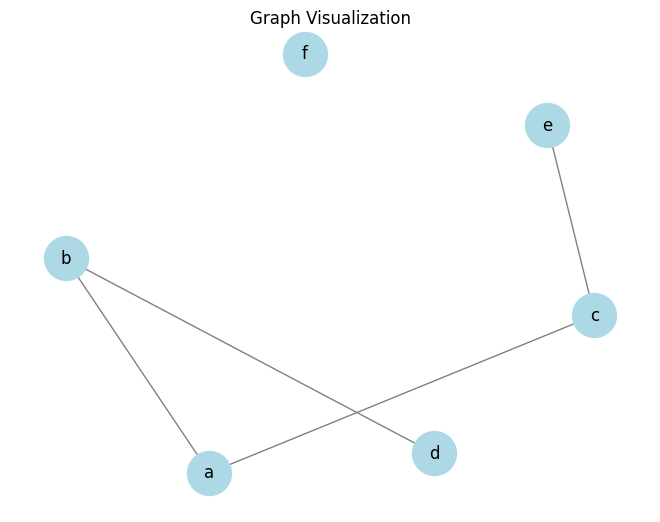

Słownik list sąsiedztwa grafu z nowym wierzchołkiem:
a: b c 
b: a d 
c: a e 
d: b 
e: c 
f: 
u: Słownik list sąsiedztwa grafu z nową krawędzią:
a: b c u 
b: a d 
c: a e 
d: b 
e: c 
f: 
u: a 

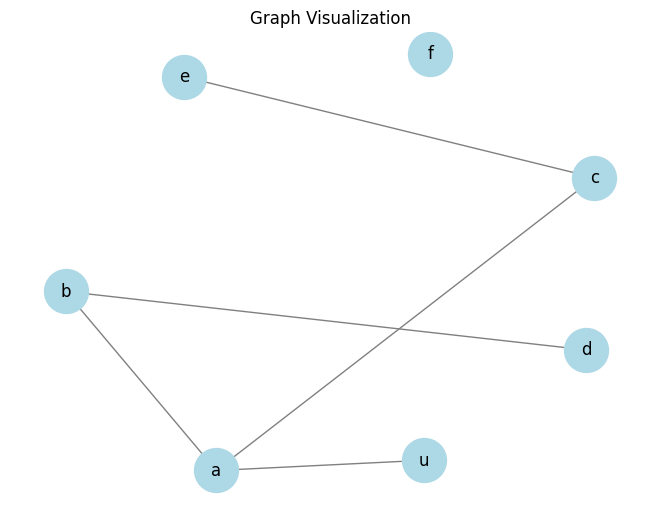

In [3]:
graph_dict = {"a": ["b", "c"],
              "b": ["a", "d"],
              "c": ["a", "e"],
              "d": ["b"],
              "e": ["c"],
              "f": []}
new_graph = Graph(graph_dict, is_directed=False)
print("Słownik list sąsiedztwa grafu:", end="")
new_graph.print_dict()
print("\nMacierz sąsiedztwa grafu:")
new_graph_matrix = new_graph.neighbours_matrix()
print(new_graph_matrix)
print("\nWizualizacja grafu:")
new_graph.plot()

new_vertex = "u"
print("Słownik list sąsiedztwa grafu z nowym wierzchołkiem:", end="")
new_graph.add_vertex(new_vertex)
new_graph.print_dict()
print("Słownik list sąsiedztwa grafu z nową krawędzią:", end="")
new_edge = ("a", "u")
new_graph.add_edge(new_edge)
new_graph.print_dict()
new_graph.plot()

# Grafy losowe

In [4]:
def generate_random_graph(vertices_count, prob=1/2, random_seed=None):
    random_state = np.random.default_rng(random_seed)
    random_graph = Graph({}, is_directed=False)
    for i in range(1, vertices_count+1):
        random_graph.add_vertex(i)
        for j in range(1, i):
            if random_state.random() < prob:
                random_graph.add_edge((i, j))

    return random_graph

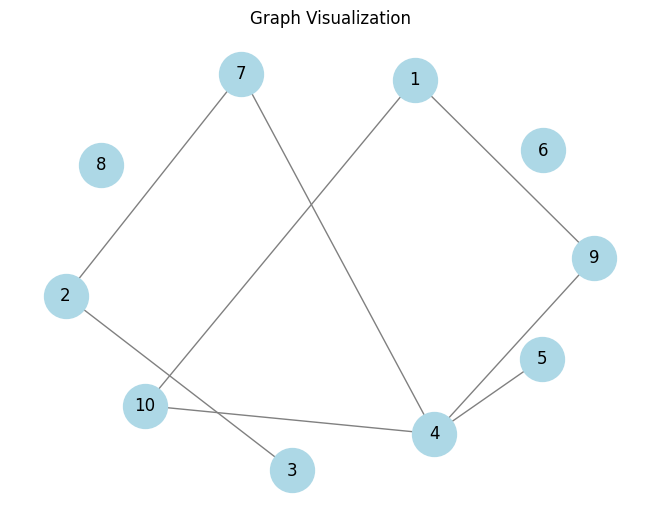

In [5]:
random_graph = generate_random_graph(vertices_count = 10, prob = 1/4, random_seed=1)
random_graph.plot()

In [6]:
def generate_random_cycle(vertices_count, random_seed=None):
    random_state = np.random.default_rng(random_seed)
    random_cycle = Graph({}, is_directed=False)
    
    vertices = list(range(1, vertices_count + 1))
    for v in vertices:
        random_cycle.add_vertex(v)

    random_state.shuffle(vertices)
    
    for i in range(len(vertices) - 1):
        random_cycle.add_edge((vertices[i], vertices[i+1]))
    random_cycle.add_edge((vertices[-1], vertices[0]))
    return random_cycle

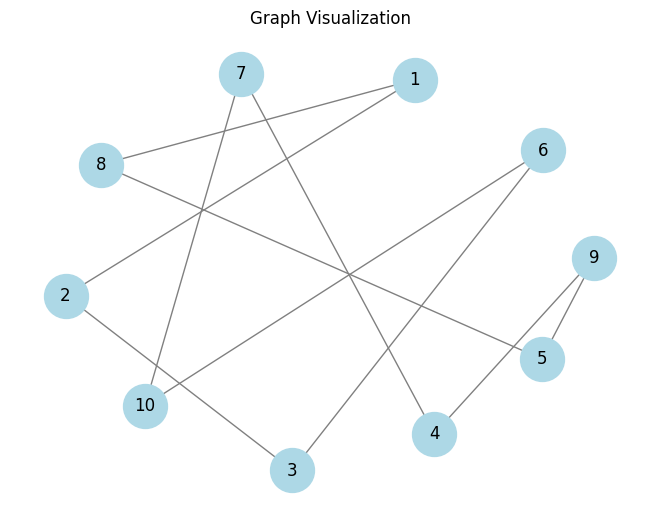

In [7]:
random_cycle = generate_random_cycle(vertices_count=10, random_seed=1)
random_cycle.plot()

# Zapis i odczyt grafów

In [8]:
def graph_from_edges_list_file(filename, is_directed=False):
    """
    Wczytuje graf z pliku w postaci listy krawędzi.
    """
    new_graph = Graph({}, is_directed=is_directed)
    file = open(filename, "r")
    with open(filename, "r") as file:
        for line in file:
            words = line.strip().split()
            if len(words) == 1:
                new_graph.add_vertex(words[0])
            elif len(words) >= 2:
                if is_directed:
                    new_graph.add_arc(words)
                else:
                    new_graph.add_edge(words)
    return new_graph

In [9]:
%%writefile from_edges_list.txt
a b
a c
b d
c e
f

Overwriting from_edges_list.txt


%cat from_edges_list.txt

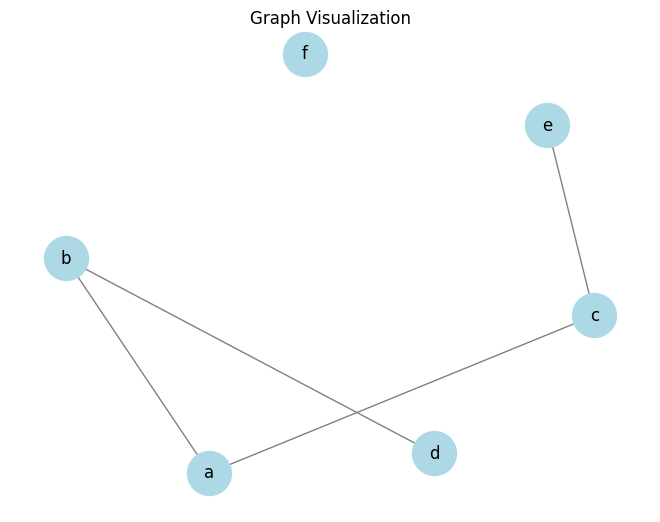

In [10]:
graph_from_edges_list_file = graph_from_edges_list_file("from_edges_list.txt")
graph_from_edges_list_file.plot()

In [11]:
def graph_from_neighbours_list_file(filename, is_directed=False):
    """
    Wczytuje graf z pliku w postaci listy sąsiedztwa.
    """
    new_graph = Graph({}, is_directed=is_directed)
    file = open(filename, "r")
    with open(filename, "r") as file:
        for line in file:
            words = line.replace(":", "").strip().split()
            starting_vertex = words[0]
            if len(words) == 1:
                new_graph.add_vertex(starting_vertex)
            elif len(words) >= 2:
                for ending_vertex in words[1:]:
                    if is_directed:
                        new_graph.add_arc((starting_vertex, ending_vertex))
                    else:
                        new_graph.add_edge((starting_vertex, ending_vertex))
    return new_graph

In [12]:
%%writefile from_neighbours_list.txt
a: b c 
b: a b d 
c: a b 
d: c  

Overwriting from_neighbours_list.txt


%cat from_neighbours_list.txt

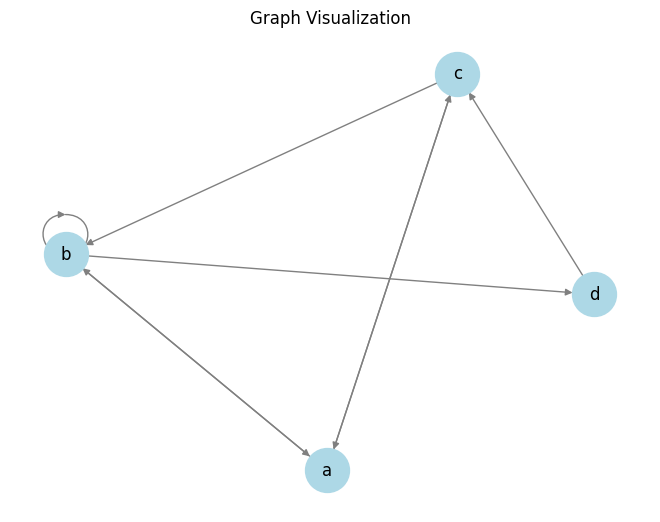

In [13]:
graph_from_neighbours_list_file = graph_from_neighbours_list_file("from_neighbours_list.txt", is_directed=True)
graph_from_neighbours_list_file.plot()

In [14]:
def graph_to_edges_list_file(graph, filename):
    """
    Zapisuje graf do pliku w formie listy sąsiedztwa.
    """
    with open(filename, "w") as file:
        for u in graph.dict:
            for v in graph.dict[u]:
                line = f"{u} {v}\n"
                file.write(line)

In [15]:
graph_to_edges_list_file(graph_from_neighbours_list_file, "to_edges_list.txt")

%cat to_neighbours_list.txt

In [16]:
def graph_to_neighbours_list_file(graph, filename):
    """
    Zapisuje graf do pliku w formie listy sąsiedztwa.
    """
    with open(filename, "w") as file:
        for v in graph.dict:
            line = f"{v}:"
            for u in graph.dict[v]:
                line += f"{u} "
            line += "\n"
            file.write(line)

In [17]:
graph_to_neighbours_list_file(graph_from_edges_list_file, "to_neighbours_list.txt")

%cat to_neighbours_list.txt